In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Beispielfunktion: $f(x) = -e^{-(x-\pi)^2}+0.01(x-\pi)^2$

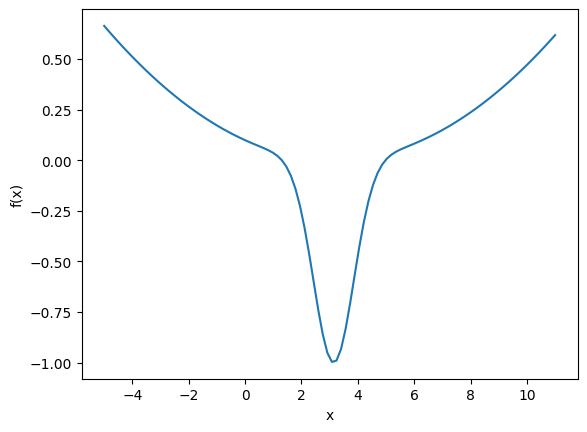

In [2]:
def f(x):
  return - torch.exp(-torch.pow(x -  np.pi, 2)) + 0.01 * torch.pow(x - np.pi, 2)

x = torch.from_numpy(np.linspace(-5, 11, 100))
y = f(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [3]:
def gradient_descent(x0, lr=0.1, max_iter=1000):
  xt = torch.tensor(x0, requires_grad=True)

  # tracking
  traj_x = [xt.item()]
  traj_y = [f(xt).item()]

  # learning
  for step in range(max_iter):
    fxt = f(xt)
    fxt.backward()
    
    # GD update rule
    with torch.no_grad():
      xt -= lr * xt.grad

    # set gradient to zero
    xt.grad.zero_()

    traj_x.append(xt.item())
    traj_y.append(fxt.item())

  return traj_x, traj_y

In [4]:
x_traj, y_traj = gradient_descent(0.0, lr=0.1)
print(f"Minimum mit lr = 0.1: {x_traj[-1]}")

Minimum mit lr = 0.1: 3.141592264175415


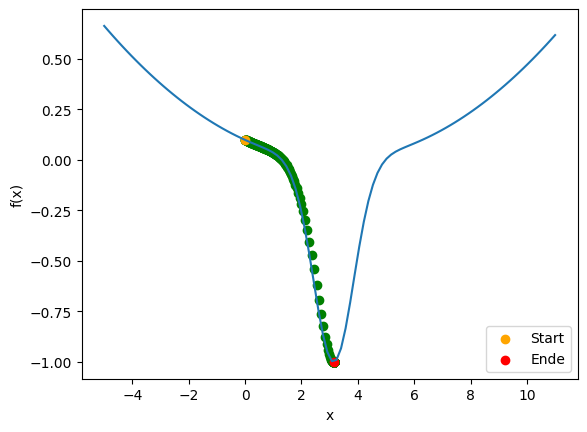

In [6]:
plt.plot(x, y)
plt.scatter(x_traj, y_traj, color="green")
plt.scatter(x_traj[0], y_traj[0], label="Start", color="orange")
plt.scatter(x_traj[-1], y_traj[-1], label="Ende", color="red")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="lower right")
plt.show()

## Autodifferentiation
Es gibt verschiedene Arten einen Gradienten zu berechnen (approximieren, manuell, ...). Autodifferentiation ist ein Konzept aus den 1960er Jahren, hat aber erst in den letzten Jahren/Jahrzenten an Bedeutung gewonnen.<br>
Diese Methode nutzt aus, dass jeder Computer ganz tief im Kern nur arithmetische Operationen (Addition, Mutliplikation, ...) ausführt. Außerdem sind alle Funktionen sind durch sogenannte elementare Funktionen (log, exp, sin, cos, ...) darstellbar. Beides führt dazu, dass man von beliebig komplizierten Funktionen auf unterster Ebene alle Ableitung/Gradienten automatisch berechnen kann.